#  Stocks Portfolio analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style


### Taking heavyweight stocks of each sector

In [12]:
stocksymbols = ['TATAMOTORS','HINDUNILVR', 'ICICIBANK','JINDALSTEL','ITC','HDFC','INFY','INDUSINDBK']

startdate = date(2022,1,1)
end_date = date.today()
print(end_date)
print(f"You have {len(stocksymbols)} assets in your porfolio" )

2022-10-31
You have 8 assets in your porfolio


### Combining all stocks closing prices into one dataframe

In [4]:
df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol=stocksymbols[i],start=startdate, end=(end_date))[['Symbol','Close']]
    data.rename(columns={'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'], axis=1,inplace=True)
    if i == 0:
        df = data
    if i != 0:
        df = df.join(data)
df

,TATAMOTORS,HINDUNILVR,ICICIBANK,JINDALSTEL,ITC,HDFC,INFY,INDUSINDBK
Date,,,,,,,,
2022-01-03,497.60,2361.30,764.70,385.85,219.10,2636.40,1898.45,912.30
2022-01-04,489.60,2401.25,772.85,388.20,220.25,2675.30,1899.15,904.40
2022-01-05,489.75,2415.80,788.05,406.40,220.55,2673.65,1844.65,903.95
2022-01-06,488.85,2391.40,785.05,402.90,218.70,2620.40,1817.80,921.70
2022-01-07,490.60,2416.15,793.25,406.60,218.40,2596.70,1814.30,922.25
...,...,...,...,...,...,...,...,...
2022-10-21,398.05,2653.90,907.15,437.95,345.60,2349.90,1500.50,1142.25
2022-10-24,401.60,2573.10,926.30,438.35,347.70,2393.00,1517.85,1145.85
2022-10-25,404.55,2505.40,925.05,451.25,346.30,2356.70,1526.30,1137.45


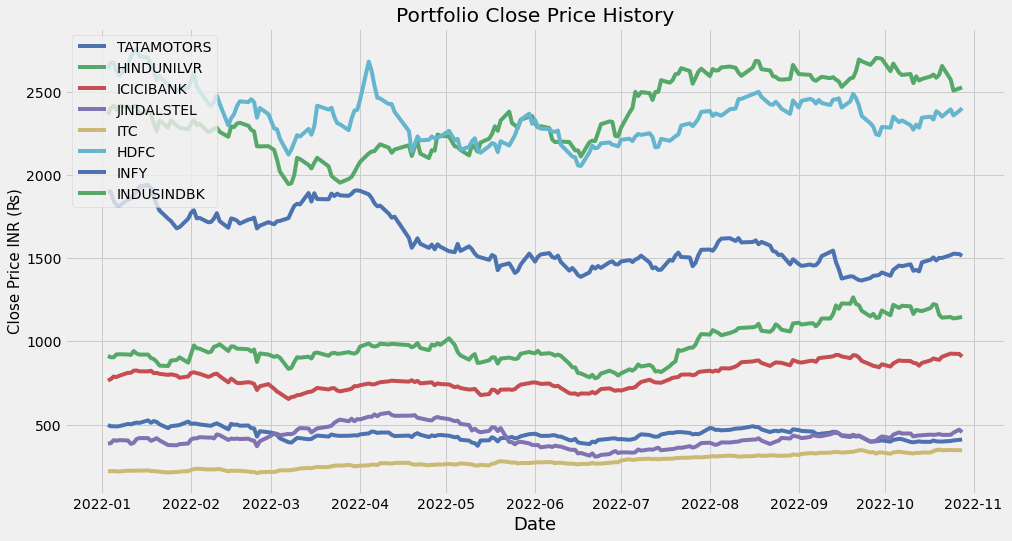

In [37]:
fig, ax = plt.subplots(figsize=(15,8))
for i in df.columns.values :
    ax.plot(df[i], label = i)
ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=15)
ax.legend(df.columns.values , loc = 'upper left')
plt.show(fig)

### Correlation matrix

Correlation between Stocks in your portfolio


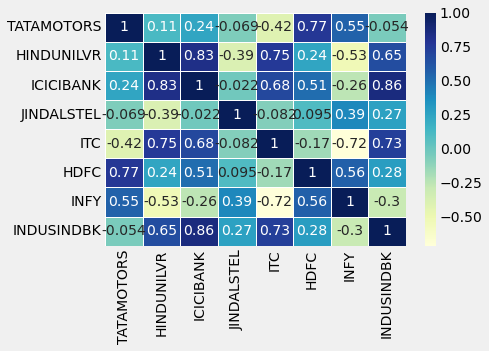

In [7]:
correlation_matrix = df.corr(method='pearson')
fig1 = plt.figure()
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show(fig1)

In [16]:
print('Returns dataframe')
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return


Returns dataframe


,TATAMOTORS,HINDUNILVR,ICICIBANK,JINDALSTEL,ITC,HDFC,INFY,INDUSINDBK
Date,,,,,,,,
2022-01-04,-0.016077,0.016919,0.010658,0.006090,0.005249,0.014755,0.000369,-0.008659
2022-01-05,0.000306,0.006059,0.019667,0.046883,0.001362,-0.000617,-0.028697,-0.000498
2022-01-06,-0.001838,-0.010100,-0.003807,-0.008612,-0.008388,-0.019917,-0.014556,0.019636
2022-01-07,0.003580,0.010350,0.010445,0.009183,-0.001372,-0.009044,-0.001925,0.000597
2022-01-10,0.026702,-0.003766,0.022061,-0.005657,0.022436,0.024242,0.020090,-0.001518
...,...,...,...,...,...,...,...,...
2022-10-21,-0.000126,0.020378,0.020818,-0.011846,-0.011724,-0.008146,-0.000267,-0.015259
2022-10-24,0.008918,-0.030446,0.021110,0.000913,0.006076,0.018341,0.011563,0.003152
2022-10-25,0.007346,-0.026311,-0.001349,0.029429,-0.004026,-0.015169,0.005567,-0.007331


### Daily returns volatility of all stocks

Daily simple returns


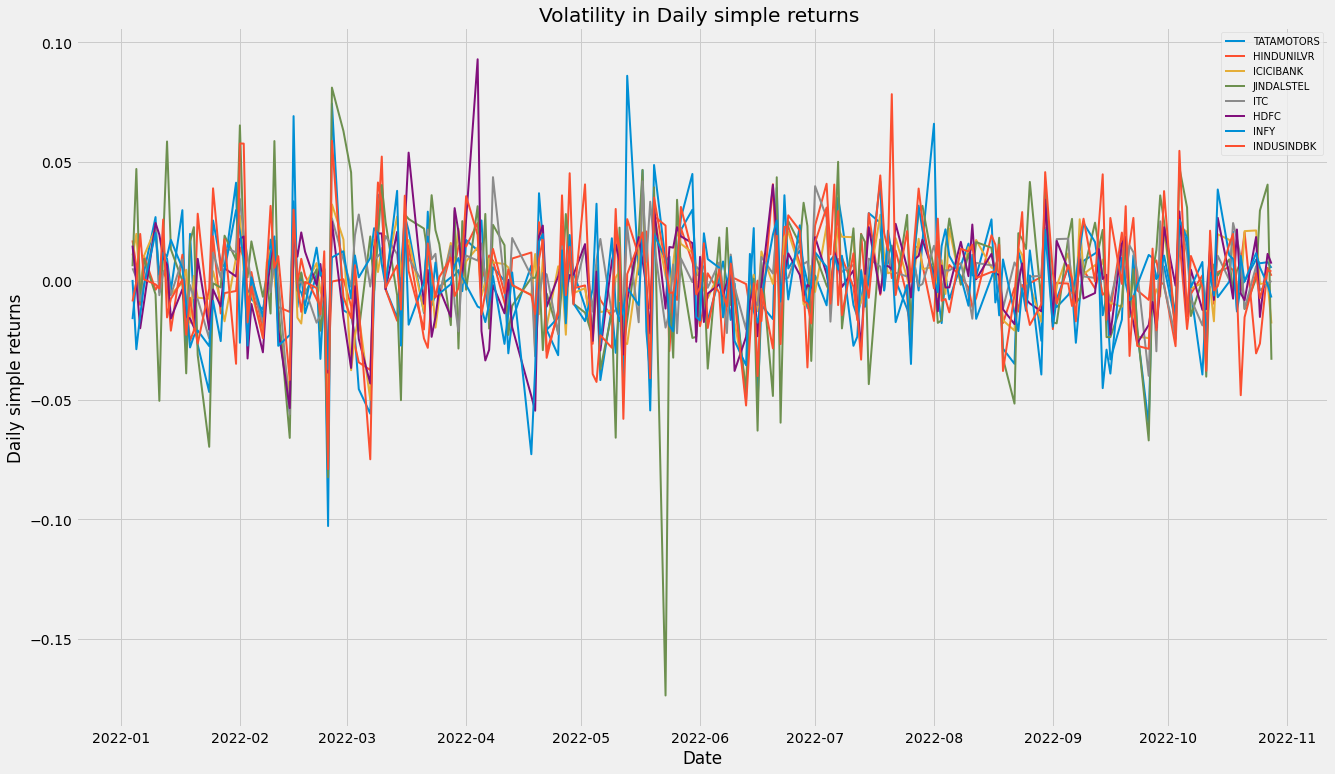

In [17]:

print('Daily simple returns')
fig, ax = plt.subplots(figsize=(20,12))


for i in daily_simple_return.columns.values :
    ax.plot(daily_simple_return[i], lw =2 ,label = i)


ax.legend( loc = 'upper right' , fontsize =10)
ax.set_title('Volatility in Daily simple returns ')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

### Average Daily returns(%) of stocks in your portfolio

In [31]:

Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)


TATAMOTORS   -0.067885
HINDUNILVR    0.046211
ICICIBANK     0.096327
JINDALSTEL    0.125194
ITC           0.234985
HDFC         -0.028827
INFY         -0.095149
INDUSINDBK    0.140134
dtype: float64


### Box plots

<AxesSubplot:title={'center':'Risk Box Plot'}>

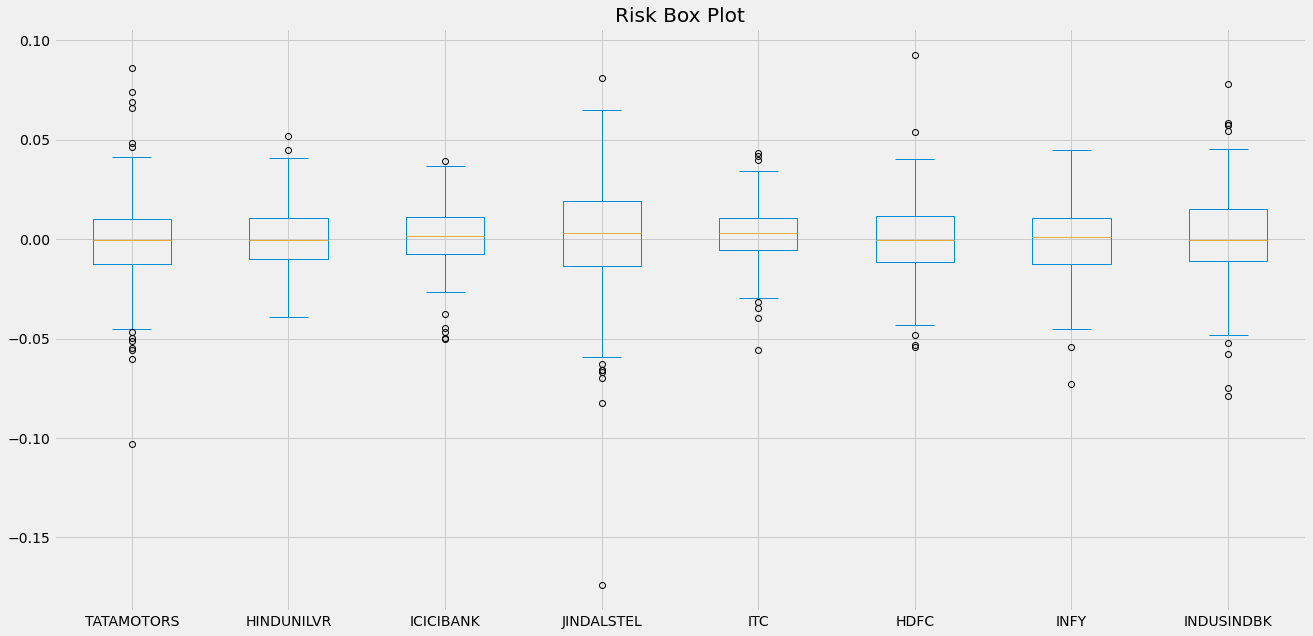

In [19]:
daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")


### Annualized Standard Deviation

In [32]:
print(daily_simple_return.std() * np.sqrt(252) * 100)


TATAMOTORS    37.337848
HINDUNILVR    26.012458
ICICIBANK     24.355522
JINDALSTEL    47.197856
ITC           22.421912
HDFC          29.682822
INFY          28.817245
INDUSINDBK    37.165527
dtype: float64


In [33]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) *100


TATAMOTORS   -0.181811
HINDUNILVR    0.177651
ICICIBANK     0.395504
JINDALSTEL    0.265253
ITC           1.048016
HDFC         -0.097116
INFY         -0.330181
INDUSINDBK    0.377055
dtype: float64

### Cumulative returns

In [23]:
daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return


,TATAMOTORS,HINDUNILVR,ICICIBANK,JINDALSTEL,ITC,HDFC,INFY,INDUSINDBK
Date,,,,,,,,
2022-01-04,0.983923,1.016919,1.010658,1.006090,1.005249,1.014755,1.000369,0.991341
2022-01-05,0.984224,1.023081,1.030535,1.053259,1.006618,1.014129,0.971661,0.990847
2022-01-06,0.982416,1.012747,1.026612,1.044188,0.998174,0.993931,0.957518,1.010304
2022-01-07,0.985932,1.023229,1.037335,1.053777,0.996805,0.984942,0.955674,1.010907
2022-01-10,1.012259,1.019375,1.060220,1.047817,1.019169,1.008819,0.974874,1.009372
...,...,...,...,...,...,...,...,...
2022-10-21,0.799940,1.123915,1.186282,1.135027,1.577362,0.891329,0.790382,1.252055
2022-10-24,0.807074,1.089696,1.211325,1.136063,1.586947,0.907677,0.799521,1.256001
2022-10-25,0.813002,1.061026,1.209690,1.169496,1.580557,0.893908,0.803972,1.246794


Cummulative Returns


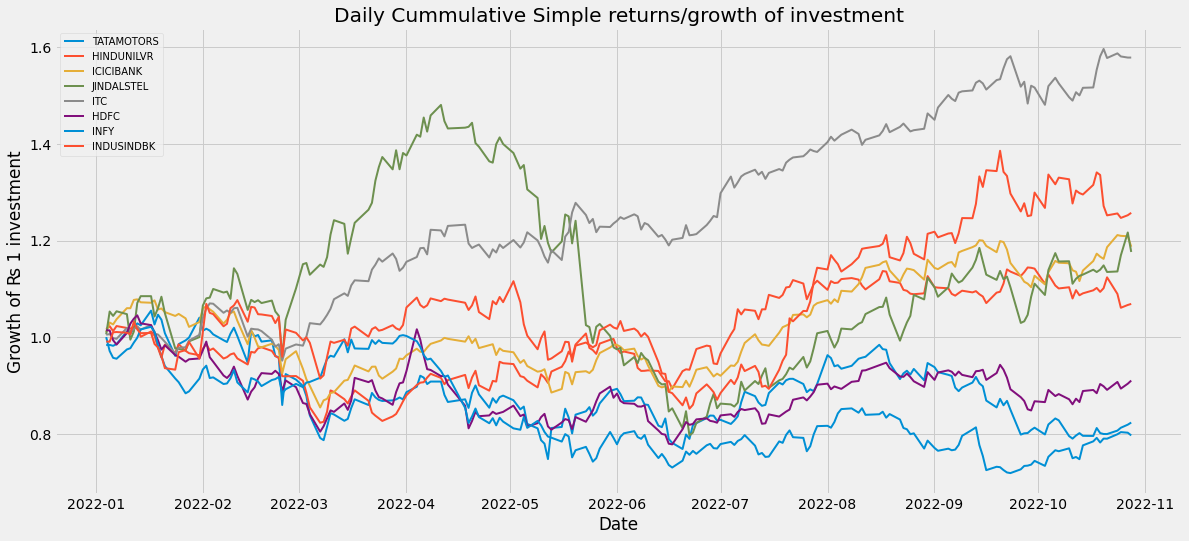

In [24]:
#visualize the daily cummulative simple return
print('Cummulative Returns')
fig, ax = plt.subplots(figsize=(18,8))

for i in daily_cummulative_simple_return.columns.values :
    ax.plot(daily_cummulative_simple_return[i], lw =2 ,label = i)

ax.legend( loc = 'upper left' , fontsize =10)
ax.set_title('Daily Cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of ₨ 1 investment')
plt.show(fig)


### Expected returns as analysed by CAPM model

In [30]:
mu = expected_returns.capm_return(df)
mu

TATAMOTORS    0.160847
HINDUNILVR    0.090608
ICICIBANK     0.109263
JINDALSTEL    0.172374
ITC           0.086562
HDFC          0.120787
INFY          0.105432
INDUSINDBK    0.158029
Name: mkt, dtype: float64